In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving destinations_db.csv to destinations_db (1).csv


In [ ]:
data = pd.read_csv("destinations_db.csv")
data.head()

,id,place_name,state,city,city_tag,phone,category,description,image_url,reviews_count,rating,lat,lng
0,1,Taman Mini Indonesia Indah,Daerah Khusus Ibukota Jakarta,Kota Jakarta Timur,jakarta,+62 804 178 9789,Wisata Rekreasi dan Keluarga,Taman yang memamerkan budaya dan alam Indonesi...,https://storage.googleapis.com/travelease-buck...,164271,4.6,-6.302039,106.889892
1,2,Taman Nasional Kepulauan Seribu,Daerah Khusus Ibukota Jakarta,Kab. Administrasi Kepulauan Seribu,jakarta,-,Wisata Alam,"Penyu, snorkeling dan menyelam di taman alam y...",https://storage.googleapis.com/travelease-buck...,555,4.6,-5.745366,106.615182
2,3,Pantai Pasir Perawan,Daerah Khusus Ibukota Jakarta,Kab. Administrasi Kepulauan Seribu,jakarta,+62 857-1048-1038,Wisata Pantai,"Di pesisir pantai, terdapat hutan mangrove hij...",https://storage.googleapis.com/travelease-buck...,717,4.8,-5.854806,106.622534
3,4,Wisata pulau,Daerah Khusus Ibukota Jakarta,Kab. Administrasi Kepulauan Seribu,jakarta,+62 858-8930-2170,Wisata Pulau,"Pantai pulau simpel dengan air jernih, serta k...",https://storage.googleapis.com/travelease-buck...,441,4.6,-5.934315,106.587570
4,5,Wisata pantai. Pulau pari,Daerah Khusus Ibukota Jakarta,Kab. Administrasi Kepulauan Seribu,jakarta,+62 858-8930-7268,Wisata Pantai,Pulau ini menawarkan pesona pantai tropis yang...,https://storage.googleapis.com/travelease-buck...,862,4.6,-5.862751,106.612058


In [ ]:
# Gabungkan fitur kategori dan deskripsi
data['combined_features'] = data['category'] + " " + data['description']

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Cek hasil transformasi
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (570, 2105)


In [ ]:
# Model Neural Network
model = Sequential()

# Layer input dengan jumlah fitur dari TF-IDF
model.add(Dense(512, input_dim=tfidf_matrix.shape[1], activation='relu'))

# Layer hidden
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Layer output (jumlah tempat wisata)
model.add(Dense(tfidf_matrix.shape[0], activation='softmax'))  # Menggunakan softmax untuk multi-class classification

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │       1,078,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 570)                 │          73,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,316,026 (5.02 MB)

 Trainable params: 1,316,026 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Untuk klasifikasi multi-class, kita akan menggunakan label yang mewakili tempat wisata
# Misalnya, kita akan menggunakan indeks tempat wisata sebagai label (output)

# Menyusun data untuk input (TF-IDF) dan output (target tempat wisata)
X = tfidf_matrix.toarray()  # Fitur input dari TF-IDF
y = np.arange(len(data))  # Target adalah indeks tempat wisata (label)

# Menggunakan One-Hot Encoding untuk output
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=len(data))

# Tampilkan contoh data untuk pelatihan
print(X.shape, y.shape)

(570, 2105) (570, 570)


In [ ]:
# Melatih model dengan data
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0000e+00 - loss: 6.3485 - val_accuracy: 0.0000e+00 - val_loss: 6.3614
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1598 - loss: 6.3184 - val_accuracy: 0.0000e+00 - val_loss: 6.4374
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0940 - loss: 6.2349 - val_accuracy: 0.0000e+00 - val_loss: 6.9100
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0709 - loss: 6.0076 - val_accuracy: 0.0000e+00 - val_loss: 7.8704
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1501 - loss: 5.6474 - val_accuracy: 0.0000e+00 - val_loss: 9.4219
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1990 - loss: 5.0782 - val_accuracy: 0.0000e+00 - val_loss: 11.4354
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4059 - loss: 4.4062 - val_accuracy: 0.0000e+00 - val_loss: 15.2946
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5631 - loss:

Text(0, 0.5, 'Training Error')

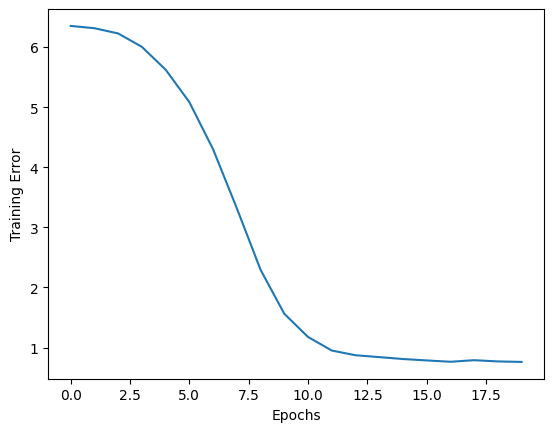

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
evaluation_results = model.evaluate(X, y, batch_size=32)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8635 - loss: 1.2793


In [ ]:
# Simpan model setelah pelatihan
model.save('tourism_recommendation_model.h5')
print("Model berhasil disimpan dalam file 'tourism_recommendation_model.h5'")

Model berhasil disimpan dalam file 'tourism_recommendation_model.h5'


In [ ]:
# Fungsi untuk memberikan rekomendasi tempat wisata berdasarkan input judul
def recommend_place(input_place, data, model, tfidf):
    # Cari indeks tempat wisata berdasarkan judul
    idx = data[data['place_name'] == input_place].index[0]

    # Ambil fitur TF-IDF dari tempat wisata input
    input_features = tfidf.transform([data.loc[idx, 'combined_features']]).toarray()

    # Prediksi probabilitas untuk setiap tempat wisata
    predictions = model.predict(input_features)

    # Ambil top 5 rekomendasi berdasarkan probabilitas tertinggi
    recommended_idx = np.argsort(predictions[0])[-100:-1]  # Ambil 5 tempat wisata teratas

    # Tampilkan tempat wisata yang direkomendasikan
    recommended_places = data.iloc[recommended_idx][['place_name', 'rating', 'reviews_count']]
    return recommended_places

In [ ]:
# Contoh penggunaan
input_place = 'Taman Mini Indonesia Indah'  # Ganti dengan nama tempat wisata
recommendations = recommend_place(input_place, data, model, tfidf)
print("Rekomendasi Tempat Wisata Berdasarkan Model:")
print(recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Rekomendasi Tempat Wisata Berdasarkan Model:
                              place_name  rating  reviews_count
93                    Air Terjun Sarasah     4.3            135
303                    Banah Cliff Point     4.5            381
314                      Bali Bird Walks     4.6            102
398  Rumah Topeng dan Wayang Setia Darma     4.8           1022
333                Museum Seni Agung Rai     4.5           1212
..                                   ...     ...            ...
7                       Monumen Nasional     4.6         114792
174                      AIK SERAN BEACH     4.1             58
406            Hidden Garden Agriculture     4.3            682
301            Taman Pecangakan - Negara     4.5           1316
423                  Bali Family Hangout     4.4             81

[99 rows x 3 columns]
